In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
pd.set_option('display.max_columns', 500)

from allensdk.brain_observatory.behavior.behavior_ophys_experiment import BehaviorOphysExperiment
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

import allensdk
import pkg_resources

import yaml

# Suppress all warnings because there are a lot of annoying user warnings when downloading stuff
import warnings
warnings.filterwarnings("ignore")

# Setting up InteractiveShell for better df visualization
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import helperfunctions saved in utils.py
from utils import create_directory_structure, save_movies, write_yaml

# exporter functions
from exporter import stimuli_export, treadmill_export, dff_export, eye_tracker_export


print("Import confirmed")
print("Allensdk version : ", allensdk.__version__)

Import confirmed
Allensdk version :  2.16.2


In [2]:
# Define the directory for the cache to prevent downloading every time
cache_dir = "data/./visual_behavior_cache"
if not os.path.exists(cache_dir):
    os.makedirs(cache_dir)

cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=cache_dir)

In [3]:
# Load experiment metadata
experiments_table = cache.get_ophys_experiment_table()

# Select a specific experiment by ID
experiment_id = experiments_table.index[0]  # Example: take the first experiment

experiments_table.head()

,behavior_session_id,ophys_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,age_in_days,imaging_depth,targeted_structure,targeted_imaging_depth,imaging_plane_group,project_code,session_type,session_number,image_set,behavior_type,passive,experience_level,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,date_of_acquisition,equipment_name,published_at,isi_experiment_id,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
951980471,951520319,951410079,1018028342,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,206,150,VISp,150,0,VisualBehaviorMultiscope,OPHYS_1_images_A,1,A,active_behavior,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,0
951980473,951520319,951410079,1018028345,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,206,225,VISp,225,0,VisualBehaviorMultiscope,OPHYS_1_images_A,1,A,active_behavior,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,1
951980475,951520319,951410079,1018028339,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,206,75,VISp,75,1,VisualBehaviorMultiscope,OPHYS_1_images_A,1,A,active_behavior,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,2
951980479,951520319,951410079,1018028354,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,206,150,VISl,150,2,VisualBehaviorMultiscope,OPHYS_1_images_A,1,A,active_behavior,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,3
951980481,951520319,951410079,1018028357,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,206,225,VISl,225,2,VisualBehaviorMultiscope,OPHYS_1_images_A,1,A,active_behavior,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,4


In [4]:
# loading cache of a single experiment to explore
experiment = cache.get_behavior_ophys_experiment(experiment_id)

In [5]:
#### metadata of single experiment
experiment.metadata

{'equipment_name': 'MESO.1',
 'sex': 'F',
 'age_in_days': 206,
 'stimulus_frame_rate': 60.0,
 'session_type': 'OPHYS_1_images_A',
 'date_of_acquisition': datetime.datetime(2019, 9, 20, 9, 59, 38, 837000, tzinfo=tzlocal()),
 'reporter_line': 'Ai148(TIT2L-GC6f-ICL-tTA2)',
 'cre_line': 'Sst-IRES-Cre',
 'behavior_session_uuid': UUID('592420fb-911d-41c5-8763-4ebdeb0ef416'),
 'driver_line': ['Sst-IRES-Cre'],
 'mouse_id': '457841',
 'project_code': 'VisualBehaviorMultiscope',
 'full_genotype': 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt',
 'behavior_session_id': 951520319,
 'indicator': 'GCaMP6f',
 'emission_lambda': 520.0,
 'excitation_lambda': 910.0,
 'ophys_container_id': 1018028342,
 'field_of_view_height': 512,
 'field_of_view_width': 512,
 'imaging_depth': 150,
 'targeted_imaging_depth': 150,
 'imaging_plane_group': 0,
 'imaging_plane_group_count': 4,
 'ophys_experiment_id': 951980471,
 'ophys_frame_rate': 11.0,
 'ophys_session_id': 951410079,
 'targeted_structure': 'VISp'}

From the metadata we know that this is a Multiscope experiment where 2 areas at 4 different depths were measured.

In [6]:
timestamps_ophys = experiment.ophys_timestamps
timestamps_ophys[:5]
# this are the timestamps for the ophys measurements

array([9.26356, 9.35677, 9.44998, 9.54318, 9.63639])

In [7]:
# Preview of dff_trace dataframe
dff_table = experiment.dff_traces
dff_table.head()
print(f"Shape of dff signals : {dff_table['dff'].iloc[0].shape}")

,cell_roi_id,dff
cell_specimen_id,,
1086613265,1080743723,"[0.9365729093551636, 0.5824856162071228, 1.296..."
1086613823,1080743752,"[0.555761456489563, 0.7478731870651245, 0.4397..."
1086619526,1080743754,"[0.2593991160392761, 0.30149346590042114, 0.34..."
1086614149,1080743763,"[0.4112476706504822, 0.1977161169052124, 0.143..."
1086614351,1080743765,"[0.08977238088846207, 0.0746675506234169, 0.26..."


Shape of dff signals : (48316,)


We can confirm that there are indeed roughly 11 frames per second per neuron during the whole experiment if we divide the lenght of the dff array by the max value of end_time. Hence the signals should be evenly spread across the whole timescale.

In [8]:
# Preview of event dataframe
event_table = experiment.events
event_table.head()

,cell_roi_id,events,filtered_events,lambda,noise_std
cell_specimen_id,,,,,
1086613265,1080743723,"[0.0, 0.0, 0.5568727052177824, 0.0, 0.46726365...","[0.0, 0.0, 0.40076209492295517, 0.148502141158...",0.0484,0.068267
1086613823,1080743752,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.1441,0.118111
1086619526,1080743754,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0966,0.097046
1086614149,1080743763,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0771,0.086072
1086614351,1080743765,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0801,0.088142


In [9]:
experiment.eye_tracking.columns

Index(['timestamps', 'cr_area', 'eye_area', 'pupil_area', 'likely_blink',
       'pupil_area_raw', 'cr_area_raw', 'eye_area_raw', 'cr_center_x',
       'cr_center_y', 'cr_width', 'cr_height', 'cr_phi', 'eye_center_x',
       'eye_center_y', 'eye_width', 'eye_height', 'eye_phi', 'pupil_center_x',
       'pupil_center_y', 'pupil_width', 'pupil_height', 'pupil_phi'],
      dtype='object')

In [10]:
# Preview of running speed dataframe
running_speed_table = experiment.running_speed
treadmill_sampling_rate = running_speed_table.shape[0] / running_speed_table["timestamps"].iloc[-1]
print("Sampling rate : ", treadmill_sampling_rate)
running_speed_table

Sampling rate :  59.8281581140981


,timestamps,speed
0,6.87653,0.039084
1,9.28021,1.448758
2,9.29687,2.724152
3,9.31357,3.763775
4,9.33024,4.505150
...,...,...
270048,4513.74432,0.994029
270049,4513.76099,1.565881
270050,4513.77764,2.329033
270051,4513.79435,3.250289


Not included in metadata but running speed is roughly measured every at 60hz. (270053/4513). However the measurements don't seem to be perfectly spread out.

In [11]:
# Preview of stimuli dataframe
stimulus_table = experiment.stimulus_presentations
stimulus_table.tail()

,stimulus_block,stimulus_block_name,image_index,image_name,movie_frame_index,duration,start_time,end_time,start_frame,end_frame,is_change,is_image_novel,omitted,movie_repeat,flashes_since_change,trials_id,stimulus_name,is_sham_change,active
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,
13798,3,natural_movie_one,-99,NaN,895,0.03333,4513.697425,4513.730755,270042,270043,False,<NA>,<NA>,9,9002,-99,natural_movie_one,False,False
13799,3,natural_movie_one,-99,NaN,896,0.03339,4513.730755,4513.764145,270044,270045,False,<NA>,<NA>,9,9003,-99,natural_movie_one,False,False
13800,3,natural_movie_one,-99,NaN,897,0.03337,4513.764145,4513.797515,270046,270047,False,<NA>,<NA>,9,9004,-99,natural_movie_one,False,False
13801,3,natural_movie_one,-99,NaN,898,0.03332,4513.797515,4513.830835,270048,270049,False,<NA>,<NA>,9,9005,-99,natural_movie_one,False,False
13802,3,natural_movie_one,-99,NaN,899,0.03339,4513.830835,4513.864225,270050,270051,False,<NA>,<NA>,9,9006,-99,natural_movie_one,False,False


In [12]:
stimulus_templates = experiment.stimulus_templates
images = stimulus_table["image_name"]
stimulus_templates.index

# here we can see that the experiment actually only includes 8 different images we should definetly not save those 8 images 10000 times.

Index(['im065', 'im077', 'im066', 'im061', 'im063', 'im062', 'im085', 'im069'], dtype='object', name='image_name')

(1200, 1920)


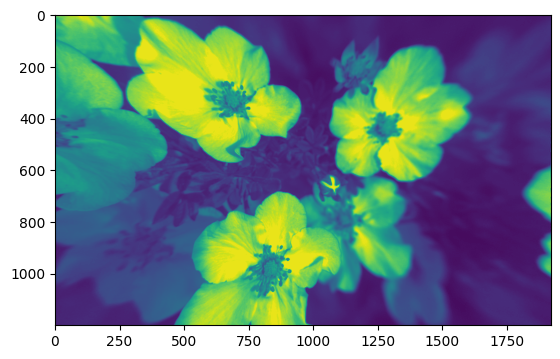

In [13]:
#showcase of a single stimulus image
plt.imshow(stimulus_templates.iloc[0]["warped"])
print(stimulus_templates.iloc[0]["warped"].shape)

## Sample export of the data from a single experiment

In [14]:
save_movies()
# saving the movies, there are only 3 in the entire experiment setup from what I could find and they are not stored here with the images

Done saving movies


In [15]:
# basic setup of file structure
!rm -r data/example_experiment

base_directory = 'data/example_experiment'
create_directory_structure(base_directory)

Directory structure created at data/example_experiment


In [16]:
# export of visual stimuli
stimuli_export(stimulus_table, stimulus_templates, 'data/example_experiment/screen')

# export of running data
treadmill_export(running_speed_table, treadmill_sampling_rate, 'data/example_experiment/treadmill')

# export of response data (dff only need to talk about event traces)
ophys_framerate = experiment.metadata["ophys_frame_rate"]
dff_export(dff_table, timestamps_ophys, ophys_framerate, 'data/example_experiment/responses')

# export of eye_tracking data
eye_tracker_export(experiment.eye_tracking, 'data/example_experiment/eye_tracker')

processing data: 13803it [02:01, 113.71it/s] 


Visual stimuli sucesfully exported
Shape of treadmill_data : (270053, 2)
Treadmill data exported succesfully
Shape of dff_values : (48316, 12)
DFF data exported succesfully
Shape of eye_tracking_data : (135805, 23)
Eyetracker data exported succesfully
